# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


Данные сервиса Яндекс.Недвижимость мы получим из файла `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед исследовательским анализом проведём обзор и предобработку данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Поиск особенностей и зависимостей в данных.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение общей информации о данных

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# получение первых 10 строк таблицы df
# print(df) <= здесь видим, что разделители '/', возвращаемся на шаг назад и добавляем этот нюанс в чтение
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 21 колонка, типы данных представлены *object, int64, float64, bool*. Количесвто значений в столбацах различается, а значит есть пропуски. Так же, названия столбцов в целом в порядке, но стоит привести их к одному стилю.

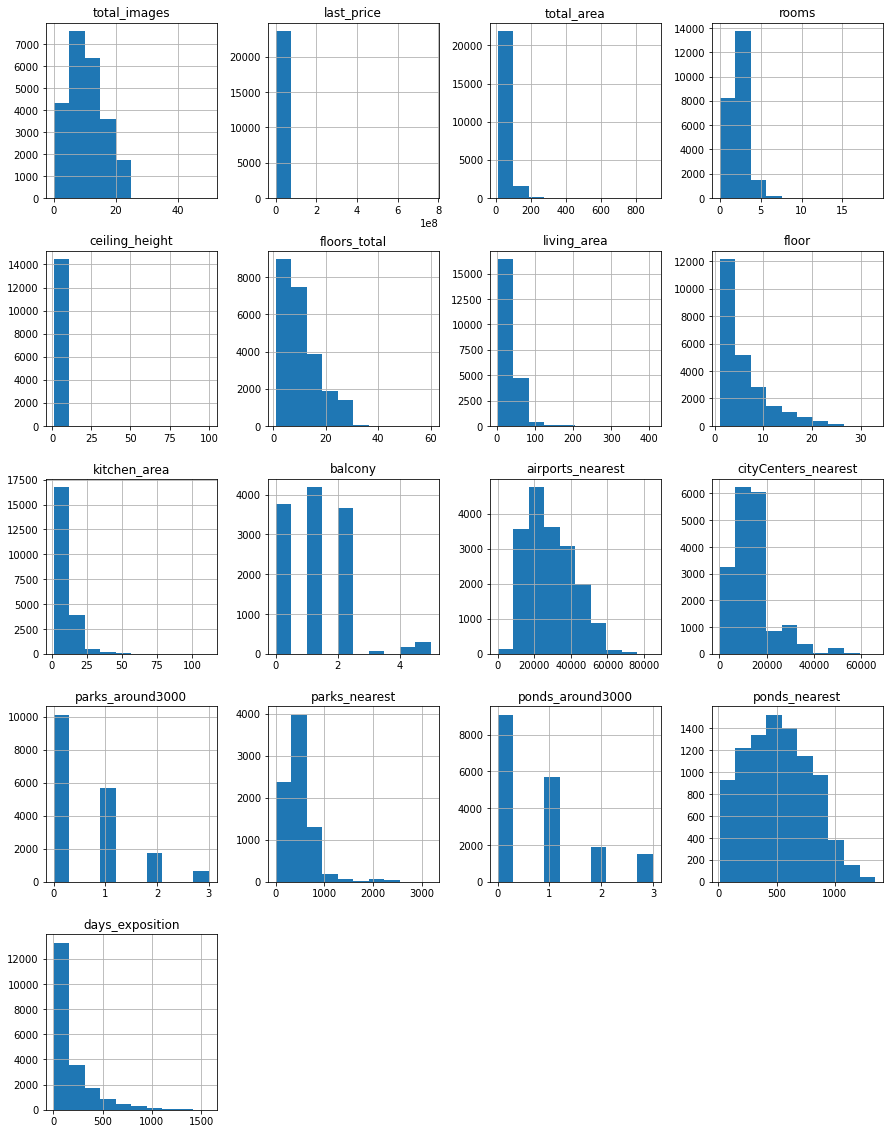

In [5]:
#строим гистограммы по всем числовым столбцам таблицы
df.hist(figsize=(15, 20))
plt.show();

Пока по гисто можно сказать лишь то, что данные на первый взгляд в целом ок. 
В дальнейшем нужно уменьшить масштаб, например, для `last_price`, `total_area`, `ceiling_height`.
И можно проверить любопытную странность с балконами: 1, 2 и без балконов частая история, а больше -- как будто и не существует. 


## Предобработка данных

### Стиль заголовков

In [6]:
# перечень названий столбцов таблицы df
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# переименование столбцов
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [8]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Пропуски значений

In [9]:
# подсчёт пропусков
df.isna().sum()
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000



Колонки с пропусками можно разделить на две категории по типу данных: добавленные пользователем и картографические.

- `balcony`, `ceiling_height`, `floors_total`, `is_apartment`, `kitchen_area`, `living_area`, `locality_name`
Из всего ряда лишь в `balcony` пропуски можно с уверенностью заменить на 0. В остальных случаях логичную замену предложить невозможно, поэтому они остаются как есть.

- `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `airports_nearest`, `city_centers_nearest`
Маловероятно, что в Санкт-Петербурге и Ленобласити есть места, где нет парков и водоёмов поблизости, но правдоподно, также причина может быть в том, что пользователи не указали адрес объекта, таким образом стало невозможно рассчитать расстояние. поэтому так же оставляем как есть.

- Отдельный тип `days_exposition` сколько дней было размещено объявление (от публикации до снятия). Пропуски в данном случае означают, что на момент выгрузки БД объявления не были сняты с публикации. А если так, то сделка не была совершена, а значит такие данные нам в текущем анализы не интересны и их следует исключить.

Вероятные причины пропусков данных: 
* пользователи не указали информацию когда создавали объявление
* в радиусе 3км нет запрашиваемых объектов
* отдельно для `days_exposition` объявление не было снято на момент выгрузки БД

Обработаем пропуски исходя из следующей логики: если пропуск в `'balcony'` - вероятнее всего балкон отсутствует, а если пропусков меньше 5-10% (`'days_exposition'`)их лучше сразу удалить, дабы сэкономить время.

In [10]:
# замена пропущенных значений на '0' и удаление строк, в которых есть пропуски в столбце 'days_exposition'
# тут же и проверим результат

df['balcony'] = df['balcony'].fillna(0)
df = df.dropna(subset=['days_exposition'])
#df.isna().sum()

### Замена типов данных

In [11]:
df['last_price'] = df['last_price'].astype(int)
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)
df['days_exposition'] = df['days_exposition'].astype(int)


# тут же проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20518 non-null  int64  
 1   last_price            20518 non-null  int64  
 2   total_area            20518 non-null  float64
 3   first_day_exposition  20518 non-null  object 
 4   rooms                 20518 non-null  int64  
 5   ceiling_height        12051 non-null  float64
 6   floors_total          20441 non-null  float64
 7   living_area           18813 non-null  float64
 8   floor                 20518 non-null  int64  
 9   is_apartment          20518 non-null  bool   
 10  studio                20518 non-null  bool   
 11  open_plan             20518 non-null  bool   
 12  kitchen_area          18443 non-null  float64
 13  balcony               20518 non-null  int64  
 14  locality_name         20470 non-null  object 
 15  airports_nearest   

Изменён тип данных `is_apartment` на bool, так как это соответсвует логике содержащихся в нем данных.
В остальных столбцах тип данных изменен скорре для красоты.

### Поиск дубликатов

In [12]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

In [13]:
# проверяем наличие неявных дубликатов
df['locality_name'].value_counts().head(20)
df['locality_name'].nunique()

330

Видим неявные дубликаты: 'посёлок', 'поселок', 'поселок городского типа' и 'городской поселок'. Приводим к одному виду: `'поселок name'`.

In [14]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace(' городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')

In [15]:
# проверяем результат
df['locality_name'].value_counts()
df['locality_name'].nunique()
#df['locality_name'].unique()

293

После приведения к единому виду, количество населенных пунктов сократилось с 330 до 293

### Поиск редких и выбивающихся значений

In [16]:
# смотрим на потолок...
df['ceiling_height'].max()
df['ceiling_height'].sort_values(ascending=False).head(15)
df['ceiling_height'].value_counts(ascending=True).head(15)
#df[df['ceiling_height']>=5]['ceiling_height'].value_counts(ascending=True)
#df[df['ceiling_height']==24.0 ]
#df['ceiling_height'].hist(range=(0, 20))

4.65     1
4.25     1
4.06     1
3.29     1
3.68     1
1.75     1
5.00     1
27.50    1
6.00     1
3.87     1
3.82     1
2.20     1
3.98     1
2.49     1
3.76     1
Name: ceiling_height, dtype: int64

Видим, что выдающихся высоких потолков не так уже и много. В выборке 5+ метров высота потолков выглядит правдоподбно вплоть до 14 метров с учетом соседних данных: last_price, total_area. Если бы в доступе были фото, они очень помогли.
Потолки от 20 метров больше похожи на опечатки: 24.0м => 2.4м. Всё те же соседние данные в этом только больше убеждают.
Объект в СПб с потолками больше двух десятков метров стоил бы явно больше 3850000.

In [17]:
# пропущенные значения заполняем медианными значениями
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

# все потолки выше 20 метров становятся ниже в 10 раз
def devide_by_ten(val):
    if val < 20:
        return val
    return val / 10

df['ceiling_height'] = df['ceiling_height'].apply(devide_by_ten)

In [18]:
# проверяем, что всё ок
#df['ceiling_height'].isna().sum()
df['ceiling_height'].max()
df['ceiling_height'].sort_values(ascending=False).head(15)
#df['ceiling_height'].value_counts(ascending=True).head(15)

15061    14.0
22309    10.3
22869    10.0
5863      8.3
3474      8.0
17442     8.0
15743     8.0
20264     6.0
21227     5.8
1388      5.6
12628     5.3
464       5.2
1053      5.0
21923     4.9
2802      4.8
Name: ceiling_height, dtype: float64

In [19]:
# на этом этапе узнаём, что в 'rooms' есть нулевые значения в 183 строках, 177 из которых апартаменты
df['rooms'].sort_values(ascending=False).head(15)
df['rooms'].value_counts(ascending=True).head(15)

df[df['rooms']==0]['living_area'].max()
df[df['rooms']==0]['last_price'].max()

df[df['rooms']==0].sort_values(by= 'last_price', ascending=False).head(15)
df[df['rooms']==0].sort_values(by= 'total_area', ascending=False)

df[(df['rooms'] == 0) & (df['is_apartment'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
839,14,1900000,35.0,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7
4930,6,2176000,23.0,2017-12-08T00:00:00,0,2.90,4.0,19.0,1,False,...,NaN,0,Санкт-Петербург,31391.0,3659.0,1.0,484.0,3.0,214.0,7
5855,3,945750,19.5,2017-09-18T00:00:00,0,2.76,3.0,12.7,2,False,...,NaN,0,поселок Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3
7256,16,3500000,29.2,2017-04-16T00:00:00,0,2.64,16.0,16.7,3,False,...,NaN,2,Санкт-Петербург,17693.0,12516.0,0.0,NaN,0.0,NaN,28
10534,10,2100000,26.7,2018-08-03T00:00:00,0,2.65,17.0,14.2,7,False,...,NaN,1,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,18
20584,12,2170000,22.2,2018-11-04T00:00:00,0,2.65,18.0,16.6,7,False,...,NaN,1,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,36


На этом этапе узнаём, что в 'rooms' есть нулевые значения в 183 строках, 177 из которых 'is_apartment' равно True.
6 значений, которые апартаментами не являются, обладают ценой до 3.5 млн и площадью до 35.0 чем очень похожи на однушки, поэтому отправляются именно в эту группу.


Отмечаем, что теперь объекты с нулевым 'rooms' это апартаменты.

In [20]:
# меняем 0 на 1 для объектов, которые не являются апартаментами
df.loc[(df['rooms'] == 0) & (df['is_apartment'] == 0), 'rooms'] = 1
#df[(df['rooms'] == 0) & (df['is_apartment'] == 1)]

**Вывод**

Предобработка позволила обнаружить и исправить три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- несоответсвие типа данных содержимому столбца,
- неявные дубликаты.

Исправления и унификация упростят работу с данными, а без дубликатов исследование станет более точным.
Теперь можем приступать к последнему шагу перед непосредственным исследованием.

## Добавление новых столбцов

In [21]:
#добавили в таблицу цену одного квадратного метра
df['price_per_m2'] = df['last_price'] / df['total_area']
df['price_per_m2'] = df['price_per_m2'].astype('int')

In [22]:
#посчитали и добавили в таблицу день, месяц, год
df['first_day_exposition'] = pd.DatetimeIndex(df['first_day_exposition'])
df['day'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [23]:
# добавляем в таблицу тип этажа квартиры: «первый», «последний», «другой»
def floor_type(x,y):
    if x == 1:
        return 'первый'
    elif x == y:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis=1)
# df['floor_type'].unique()

In [24]:
# добавляем в таблицу: расстояние в км до центра города
df['city_centers_nearest_km'] = df['city_centers_nearest'] / 1000
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].round()
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day,month,year,floor_type,city_centers_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,84.0,3.0,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,...,NaN,NaN,NaN,55,95065,0,9,2018,другой,NaN


## Исследовательский анализ данных

### Общие параметры квартир

,total_area
count,20518.000000
mean,58.870830
std,34.077046
min,12.000000
25%,39.500000
50%,50.900000
75%,67.900000
max,900.000000


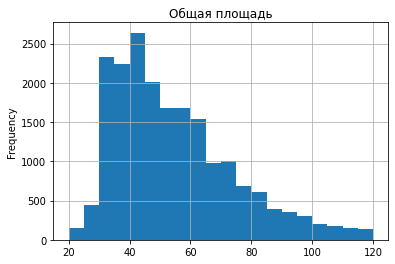

In [25]:
# строим гистограмму
df['total_area'].plot(kind='hist', bins=20, range=(20,120), title='Общая площадь', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['total_area'].quantile(0.05), df['total_area'].quantile(0.95)
# добавляем описательную статистику
df[['total_area']].describe()
#df['total_area'].median()

**Вывод по общей площади квартир**:
* Половина объектов площадью от **39.50** до **67.90**м²
* Минимальная площадь **12.00**  м²
* Средняя площадь **58.87** м²
* Медианная площадь **50.9** м²
* Максимальная площадь **900.00** м²

,living_area
count,18813.000000
mean,33.538133
std,21.317216
min,2.000000
25%,18.300000
50%,30.000000
75%,41.600000
max,409.700000


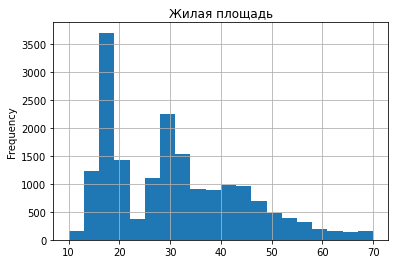

In [26]:
# строим гистограмму
df['living_area'].plot(kind='hist', bins=20, range=(10,70), title='Жилая площадь', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['living_area'].quantile(0.05), df['living_area'].quantile(0.95)
# добавляем описательную статистику
df[['living_area']].describe()
#df['living_area'].median()

**Вывод по жилой площади квартир**:
* У половины объектов жилая площадь от **18.30** до **41.60**м²
* Минимальная площадь **2.00**  м²
* Средняя площадь **33.54** м². Так же стоит отметить, что на графике видно два пика 18 метров и 30 метров.
* Медианная площадь **30.00** м²
* Максимальная площадь **409.70** м²

,kitchen_area
count,18443.000000
mean,10.436742
std,5.682611
min,2.000000
25%,7.000000
50%,9.100000
75%,11.950000
max,112.000000


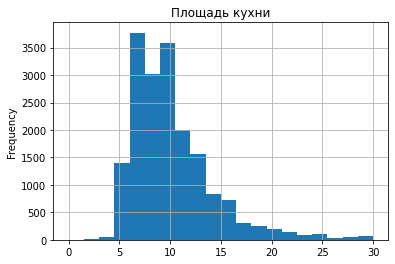

In [27]:
# строим гистограмму
df['kitchen_area'].plot(kind='hist', bins=20, range=(0,30), title='Площадь кухни', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['kitchen_area'].quantile(0.05), df['kitchen_area'].quantile(0.95)
# добавляем описательную статистику
df[['kitchen_area']].describe()
#df['living_area'].median()

**Вывод по кухням**:
* У половины объектов площадь кухни от **7** до **11.95**м²
* Минимальная площадь **2.00**  м²
* Средняя площадь **10.44** м²
* Медианная площадь **30.00** м²
* Максимальная площадь **112* м²

,last_price
count,2.051800e+04
mean,6.266173e+06
std,1.086298e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.500000e+06
75%,6.500000e+06
max,7.630000e+08


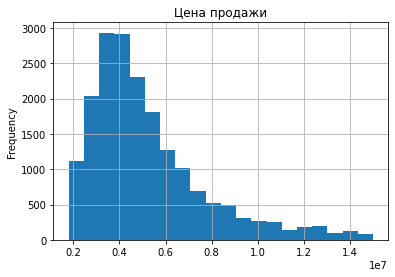

In [28]:
# строим гистограмму
df['last_price'].plot(kind='hist', bins=20, range=(1800000,14990674), title='Цена продажи', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['last_price'].quantile(0.05), df['last_price'].quantile(0.95)
# добавляем описательную статистику
df[['last_price']].describe()
#df['last_price'].median()

**Вывод по ценам продажи**:
* У половины объектов цена от **3.5** до **6.5** млн
* Минимальная цена **1.2**  млн
* Средняя цена **6.3** млн
* Медианная цена **4.5** млн
* Максимальная цена **76* млн

,rooms
count,20518.000000
mean,2.024856
std,1.054385
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


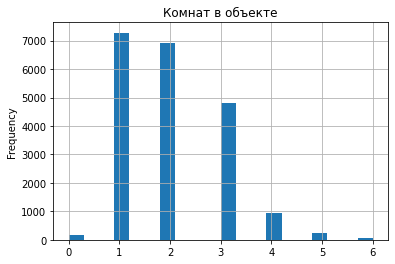

In [29]:
# строим гистограмму
df['rooms'].plot(kind='hist', bins=20, range=(0,6), title='Комнат в объекте', grid=True)
# с помощью квантилей определяем range для гистограммы 

# добавляем описательную статистику
df[['rooms']].describe()
#df['rooms'].median()

**Вывод по количеству комнат**:
* В основм у объектов от **1** до **3** комнат, в среднем **2** комнаты, самое большое число: **19**.
* **0** комнат в апартаментах

,floor
count,20518.000000
mean,5.987133
std,4.943915
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,33.000000


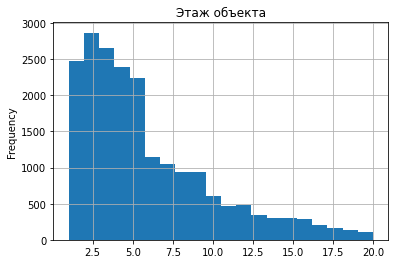

In [30]:
# строим гистограмму
df['floor'].plot(kind='hist', bins=20, range=(1,20), title='Этаж объекта', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['floor'].quantile(0.05), df['floor'].quantile(0.95)

# добавляем описательную статистику
df[['floor']].describe()
#df['floor'].median()

**Вывод**:
* Половина объектов расположилась между **2** и **8** этажами
* Обычно квартира располагается на **4** (медиана) или **6**(среднее) этаже.
* Самый высокий этаж **33**

,floors_total
count,20441.000000
mean,10.860770
std,6.652375
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


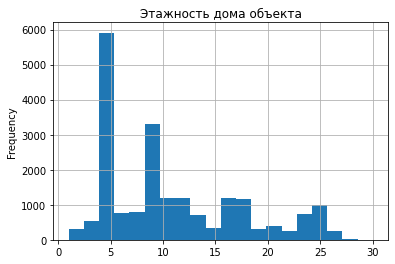

In [31]:
# строим гистограмму
df['floors_total'].plot(kind='hist', bins=20, range=(1,30), title='Этажность дома объекта', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['floors_total'].quantile(0.05), df['floors_total'].quantile(0.95)

# добавляем описательную статистику
df[['floors_total']].describe()
#df['floors_total'].median()

**Вывод**:

Половина объектов расположилась в домах высотностью от **5** до **16** этажей.
Так же это видно графике: 5 и 9 этажей – типовые советские панельки, которых в России преобладающее число.
16 и 25 наиболее популярная этажность новых домов в современной России.

Обычно квартира располагается в **9-этажном** (медиана) или **11-этажном** доме

Самый высокий дом **60** этажей

(2.5, 3.1)

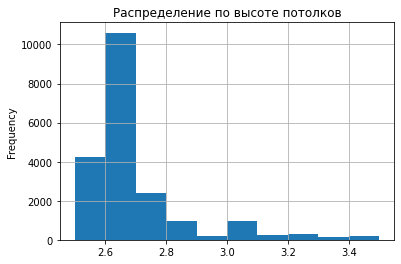

In [32]:
# строим гистограмму
df['ceiling_height'].plot(kind='hist', bins=10, range=(2.5,3.5), title='Распределение по высоте потолков', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['ceiling_height'].quantile(0.05), df['ceiling_height'].quantile(0.95)

**Вывод**: 

**2.7** метра самая распространнёная высота потолков, веротно из-за заполнения медианным значением, а так же потому что 2.5-2.6 это самый популярный стандарт потолков. 

,city_centers_nearest
count,15865.000000
mean,14292.967097
std,8559.271776
min,208.000000
25%,9479.000000
50%,13166.000000
75%,16386.000000
max,65968.000000


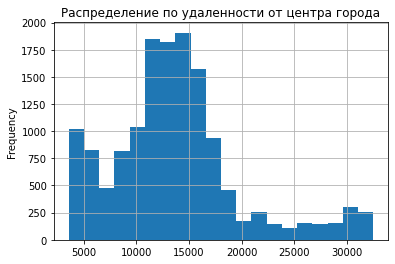

In [33]:
# строим гистограмму
df['city_centers_nearest'].plot(kind='hist', bins=20, range=(3600,32500), title='Распределение по удаленности от центра города', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['city_centers_nearest'].quantile(0.05), df['city_centers_nearest'].quantile(0.95)

# добавляем описательную статистику
df[['city_centers_nearest']].describe()
#df['city_centers_nearest'].median()

**Вывод**:
* В основном объекты расположены от центра  от **9.5** до **16** километров.
* Чаще всего в **13-14** км. Наиболее удаленный объект в **66** км, а ближе всего в **200** метрах

,airports_nearest
count,15843.000000
mean,28840.336047
std,12706.704083
min,0.000000
25%,18500.000000
50%,26768.000000
75%,37407.000000
max,84869.000000


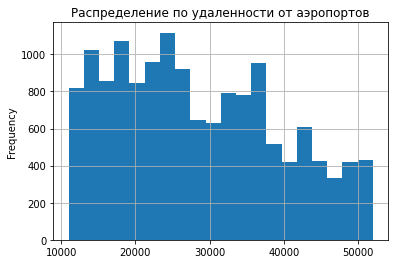

In [34]:
# строим гистограмму
df['airports_nearest'].plot(kind='hist', bins=20, range=(11000,52000), title='Распределение по удаленности от аэропортов', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['airports_nearest'].quantile(0.05), df['airports_nearest'].quantile(0.95)

# добавляем описательную статистику
df[['airports_nearest']].describe()
#df['airports_nearest'].median()

**Вывод**:

* В основм объекты расположены от аэропорта  от **18.5** до **37** километров.
* Чаще всего в **26-28** км. Наиболее удаленный объект в **85** км, есть объекты максимально приближенные к аэропроту.

,parks_nearest
count,6934.000000
mean,491.088405
std,345.533073
min,1.000000
25%,287.000000
50%,451.000000
75%,613.000000
max,3190.000000


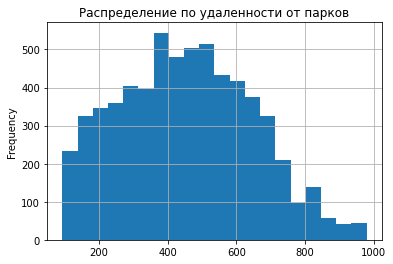

In [35]:
# строим гистограмму
df['parks_nearest'].plot(kind='hist', bins=20, range=(93,979), title='Распределение по удаленности от парков', grid=True)
# с помощью квантилей определяем range для гистограммы 
df['parks_nearest'].quantile(0.05), df['parks_nearest'].quantile(0.95)

# добавляем описательную статистику
df[['parks_nearest']].describe()
#df['parks_nearest'].median()

**Вывод**:

* В основм объекты расположены от парков  от **287** до **613** метров.
* Чаще всего в **400** м. Наиболее удаленный объект в **3** км, есть объекты максимально приближенные к парку.

,day
count,20518.000000
mean,2.585730
std,1.783619
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,6.000000


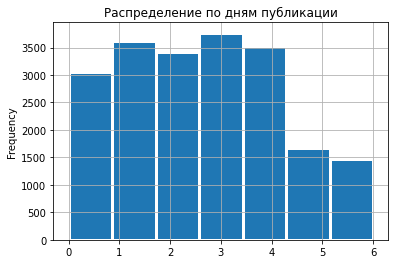

In [36]:
# строим гистограмму
df['day'].plot(kind='hist', bins=7, range=(0,6), title='Распределение по дням публикации',
               edgecolor='white', linewidth=3, grid=True)

# добавляем описательную статистику
df[['day']].describe()
#df['day'].median()

**Вывод**: Объявления публикуют в основном в **будние дни**, а выходные публикуют в два раза меньше.
Чаще всего публикую в **четверг**.

,month
count,20518.000000
mean,6.585242
std,3.486362
min,1.000000
25%,3.000000
50%,7.000000
75%,10.000000
max,12.000000


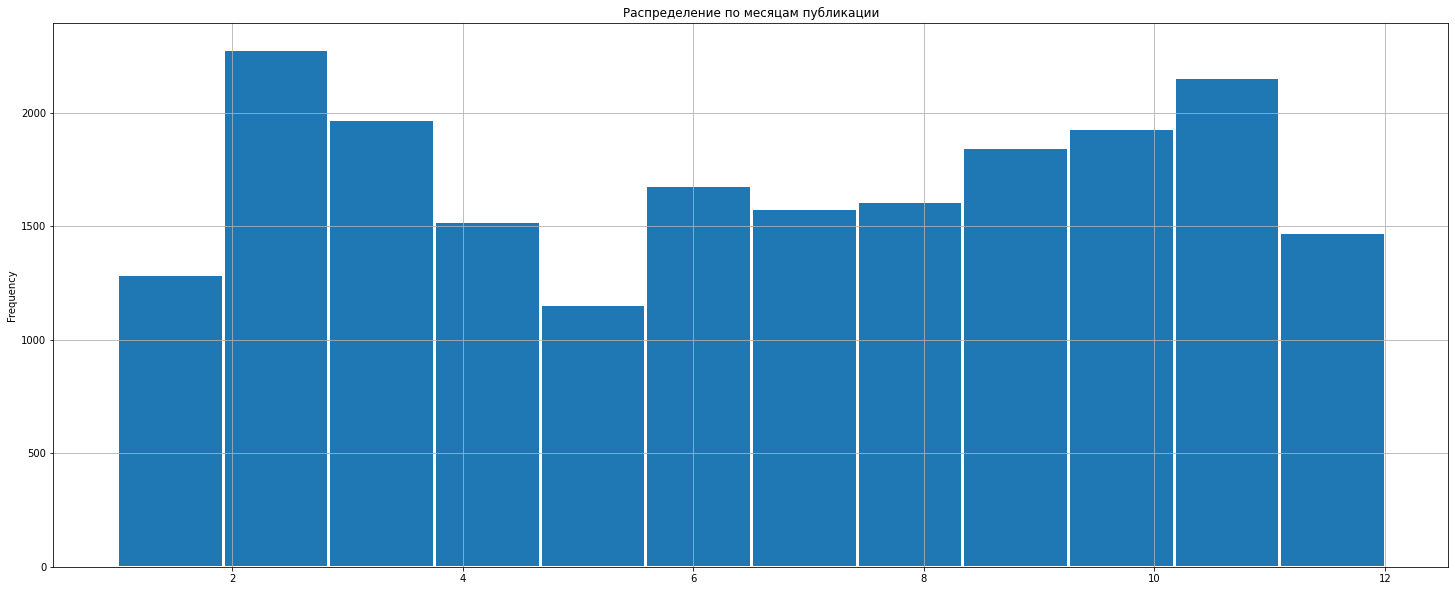

In [37]:
# строим гистограмму
df['month'].plot(kind='hist', bins=12, range=(1,12), title='Распределение по месяцам публикации',
                 edgecolor='white', linewidth=3, grid=True, figsize=(25, 10))

# добавляем описательную статистику
df[['month']].describe()
#df['month'].median()

**Вывод**: 

* Выделяются два периода: **февраль-апрель** и **июнь-ноябрь** с пиком объявлений в **феврале** и **ноябре**.
* Наблюдается ожидаемый спад в **мае** и **декабре-январе**.
* Чаще всего публикую в **феврале**.

<AxesSubplot:>

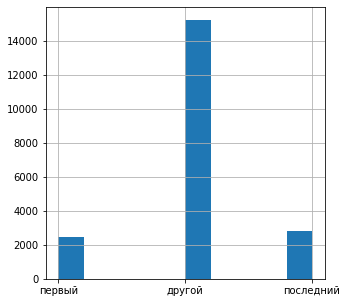

In [38]:
# смотрим, как количество сделок разделилось по типам этажа

df['floor_type'].value_counts()
df['floor_type'].hist(figsize=(5, 5))

**Вывод**:
    
Выборка объектов между первым и последним этажем составляет **75%** 
от общего числа, а первый и последний этажи делят примерно равные доли около **13%**.

### Как быстро продавались квартиры?

In [39]:
# посмотрим описательную статистику по дням, сколько было размещено объявление (от публикации до снятия)
df[['days_exposition']].describe()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [40]:
# с помощью квантилей определяем range для гистограммы и медианное значение
df['days_exposition'].quantile(0.05), df['days_exposition'].quantile(0.95), df['days_exposition'].median()

(9.0, 647.0, 95.0)

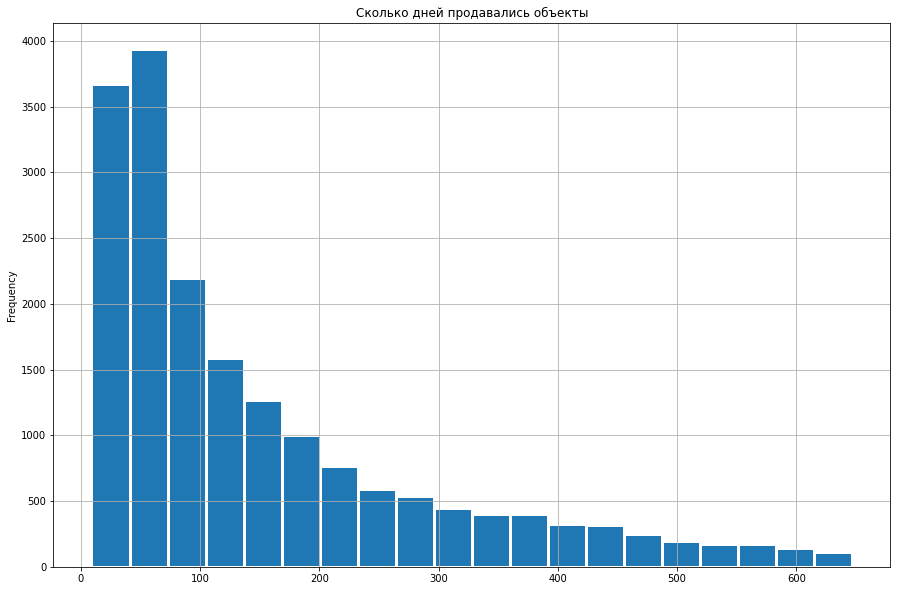

In [41]:
# строим гистограмму
df['days_exposition'].plot(kind='hist', bins=20, range=(9,647), figsize=(15, 10), title='Сколько дней продавались объекты',
                 edgecolor='white', linewidth=3, grid=True)
plt.show();

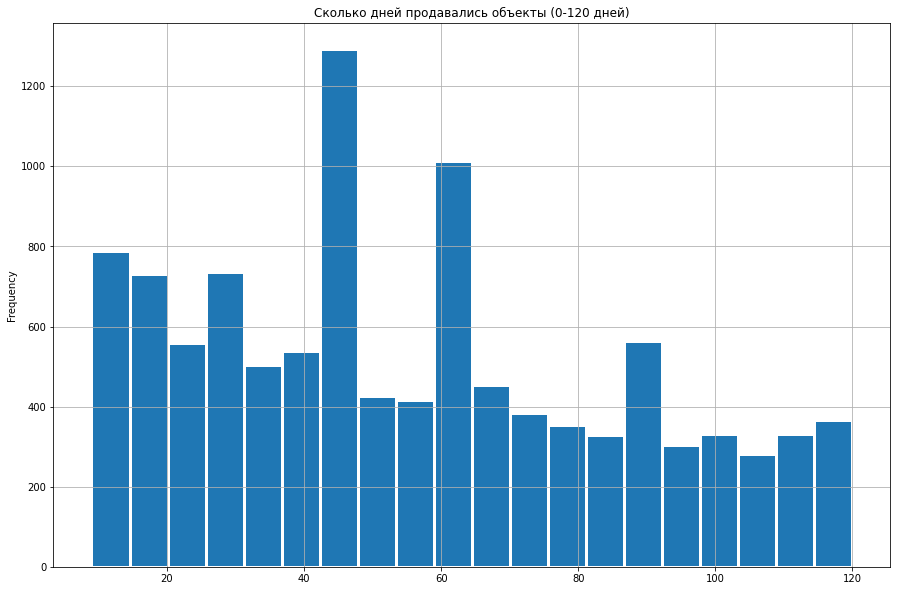

In [42]:
# строим гистограмму
df['days_exposition'].plot(kind='hist', bins=20, range=(9,120), figsize=(15, 10), title='Сколько дней продавались объекты (0-120 дней)',
                 edgecolor='white', linewidth=3, grid=True)
plt.show();

**Вывод**:

Половина объектов продается за **95** дней. Самая быстрая продажа – **1** день, самая долгая история – больше четырёх лет.
Судя по графикам, быстрой продажей можно считать срок до 95 дней, а необычно долгой – 400.

Также, можно заметить три пика на более детальном графике: **45**, **60** и **90** дней.
Эти аномалии очень похожи на техническую особенность самой платформы: вероятно, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [43]:
# посмотрим на корреляцию между всеми значениями в таблице
corr = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'day', 'month', 'year']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms,floor,day,month,year
last_price,1.000000,0.643127,0.557479,0.510099,0.354026,0.026187,0.004637,0.005631,-0.061122
total_area,0.643127,1.000000,0.939061,0.610924,0.759590,-0.025118,-0.002638,0.004229,-0.113110
living_area,0.557479,0.939061,1.000000,0.431145,0.847043,-0.099613,-0.003099,-0.002806,-0.106704
kitchen_area,0.510099,0.610924,0.431145,1.000000,0.266218,0.143948,-0.006563,0.001328,-0.064468
rooms,0.354026,0.759590,0.847043,0.266218,1.000000,-0.155440,-0.003854,-0.001664,-0.096854
floor,0.026187,-0.025118,-0.099613,0.143948,-0.155440,1.000000,0.014286,0.016923,0.018406
day,0.004637,-0.002638,-0.003099,-0.006563,-0.003854,0.014286,1.000000,0.009927,0.006024
month,0.005631,0.004229,-0.002806,0.001328,-0.001664,0.016923,0.009927,1.000000,-0.196851
year,-0.061122,-0.113110,-0.106704,-0.064468,-0.096854,0.018406,0.006024,-0.196851,1.000000


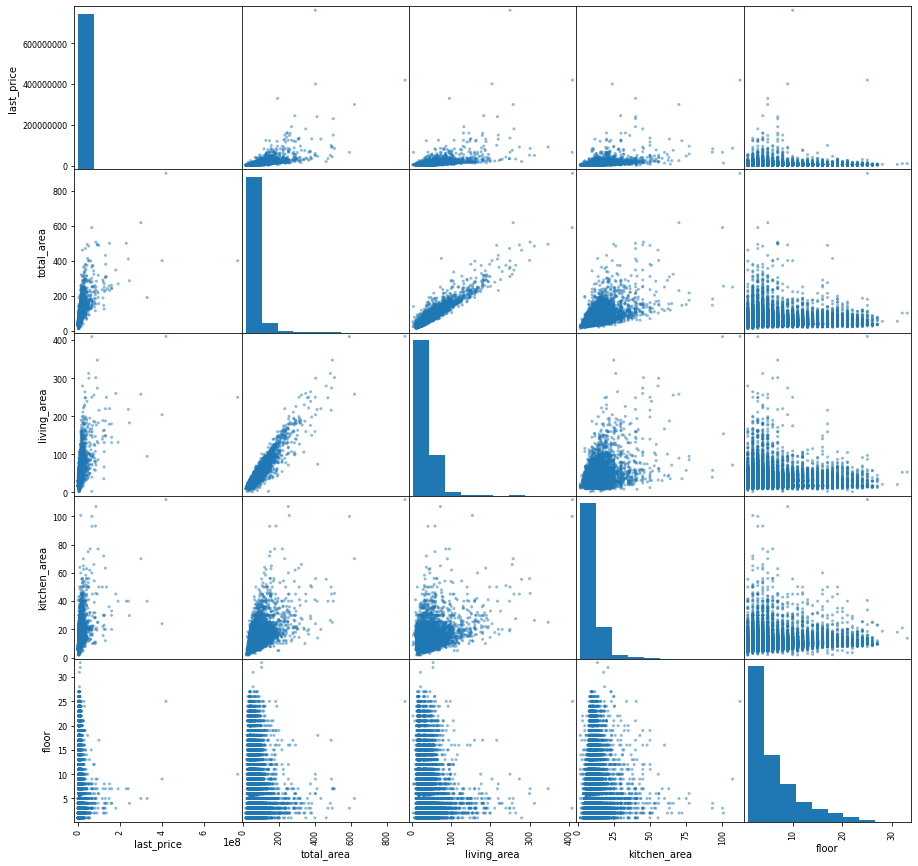

In [44]:
# посмотрим, как эта же информация выглядит на графике
pd.plotting.scatter_matrix(df[['last_price', 'total_area', 'living_area', 
                               'kitchen_area', 'floor']], figsize=(15,15))
plt.show();

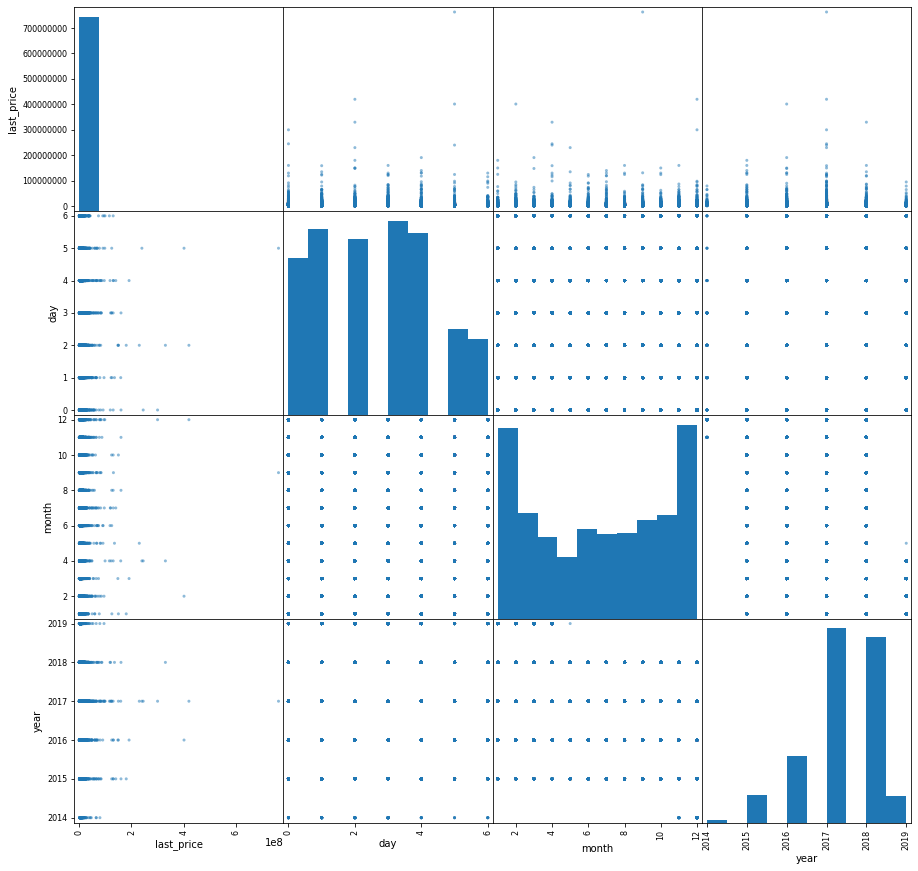

In [45]:
pd.plotting.scatter_matrix(df[['last_price', 'day', 'month', 'year']], figsize=(15,15))
plt.show();

(0.0, 100000000.0)

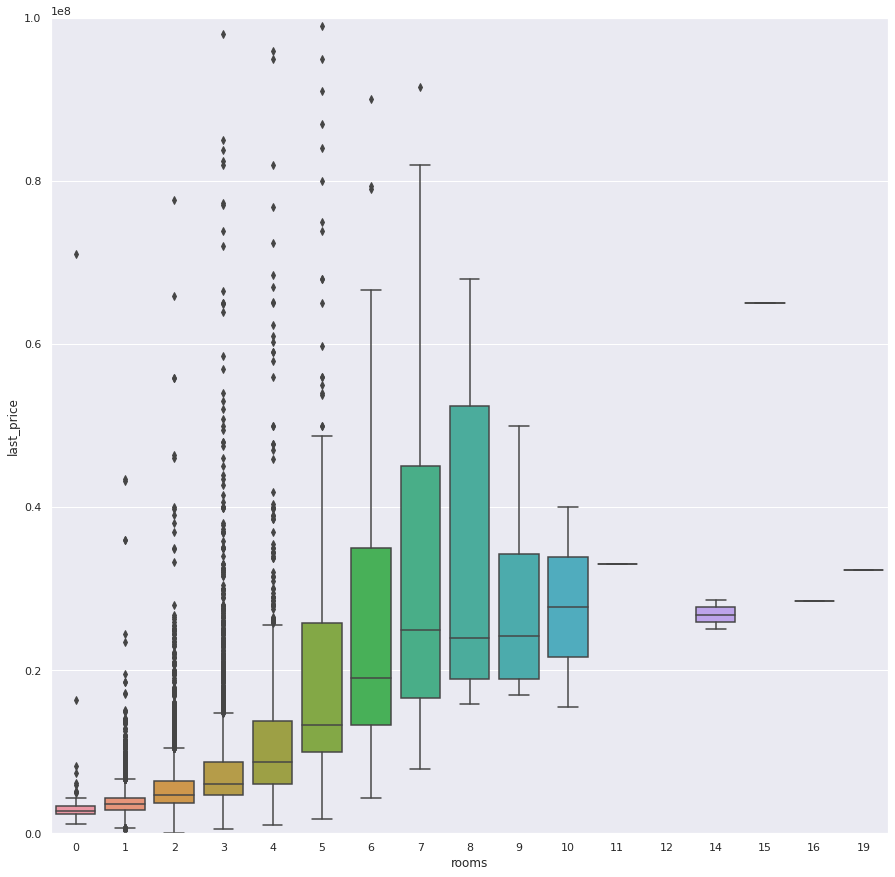

In [66]:
ax = sns.boxplot(x='rooms', y='last_price', data=df)
sns.set(rc={"figure.figsize":(15, 15)})
ax.set_ylim(0, 100000000)

Откровенно говоря, единственное наблюдение, которое можно отметить это то, что у `total_area`и `living_area` корреляция с `last_price` немногим выше 0.5, т.е. зависимость есть, но слабая, или нелинейная.

In [47]:
# Смотрим, как тип этажа повлиял на стоимость одного квадратного метра
df.groupby('floor_type')['price_per_m2'].agg('median')

floor_type
другой       97087.0
первый       80367.5
последний    87531.0
Name: price_per_m2, dtype: float64

**Вывод**:

Самая высокая цена у объектов между первым и последним этажами, а самая низкая у объектов на первом. Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.

### Средняя цена одного квадратного метра

In [48]:
# Топ-10 городов дорогостоящих 
df.groupby('locality_name')['price_per_m2'].agg('median', 'sort').sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      103057.0
Зеленогорск          100000.0
Кудрово               98604.0
Сестрорецк            98341.0
Пушкин                97938.0
поселок Левашово      96997.0
деревня Кудрово       91860.0
поселок Парголово     91387.0
деревня Мистолово     90229.0
поселок Стрельна      87322.5
Name: price_per_m2, dtype: float64

In [49]:
# Топ-10 населенных пунктов недорогих 
df.groupby('locality_name')['price_per_m2'].agg('median', 'sort').sort_values().head(10)

locality_name
деревня Старополье         11000.0
поселок станции Свирь      11481.0
деревня Вахнова Кара       11688.0
деревня Выскатка           12335.0
поселок Совхозный          12628.5
деревня Малая Романовка    12724.0
поселок Тесово-4           12931.0
деревня Ям-Тесово          13711.0
поселок Житково            14956.0
поселок станции Лужайка    15000.0
Name: price_per_m2, dtype: float64

**Вывод**:


Самая высокая цена квадратного метра из списка `Топ-10` в Санк-Петербурге **103057**, самая низкая -- в поселке Стрельна **87322**.

Для интереса: самая низкая цена квадратного метра в Ленобласти в деревне Старополье **11000**, в 180км от СПб.

In [50]:
# средняя цена для ТОП-10 районов по кол-ву объявлений 
top_locality = df['locality_name'].value_counts().head(10)
locality_price = df.pivot_table(index='locality_name', values='price_per_m2', aggfunc='median')
locality_price.merge(top_locality,  how='right', left_index=True, right_index=True
                    ).sort_values(by='price_per_m2', ascending=False).round()


,price_per_m2,locality_name
Санкт-Петербург,103057.0,13638
Пушкин,97938.0,307
деревня Кудрово,91860.0,299
поселок Парголово,91387.0,302
поселок Мурино,86075.0,551
поселок Шушары,76220.0,408
Колпино,74005.0,308
Гатчина,67180.0,268
Всеволожск,65789.0,339
Выборг,56960.0,208


**Вывод**:

По ТОП-10 районам по количеству объявлений расклад такой: Самый дорогий маедианный метр в Санкт-Петерубурге: `103057.0` самая низкая цена в Выборге `56960.0`.

### Средняя цена каждого километра от центра Санкт-Петербурга

In [60]:
# Выделяем объекты в Санкт-петребурге и вычисляем среднюю цену каждого километра
spb_center_groped_per_m = df[df['locality_name']=='Санкт-Петербург'
                            ].groupby('city_centers_nearest_km')['price_per_m2'].agg('median')

spb_center_groped_per_m.head(10)

city_centers_nearest_km
0.0    144957.0
1.0    126036.0
2.0    119531.0
3.0    105249.5
4.0    115496.5
5.0    126237.0
6.0    127792.5
7.0    123509.0
8.0    120980.0
9.0    104328.0
Name: price_per_m2, dtype: float64

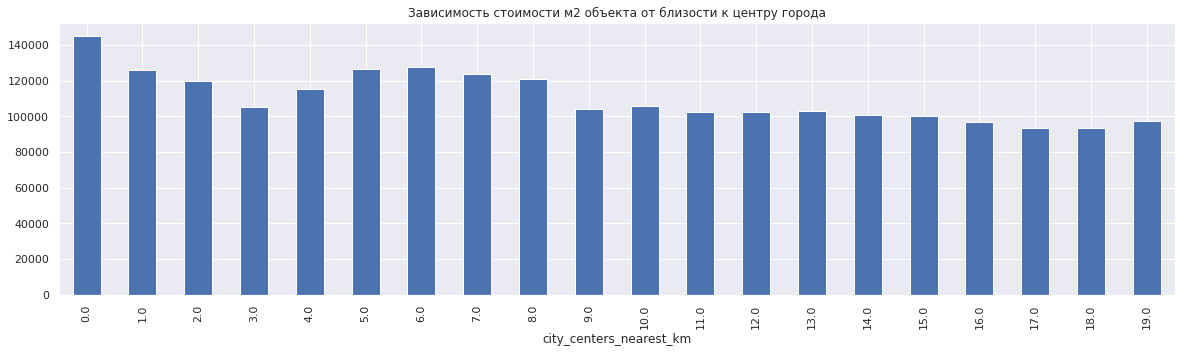

In [65]:
#Отражаем на графике как стоимость объектов зависит от расстояния до центра города
spb_center_groped_per_m.head(20).plot(
    kind='bar', figsize=(20, 5), title = 'Зависимость стоимости м2 объекта от близости к центру города');

Получилось не очень красиво первый километр отражен как 0, зато очень наглядно видно, что в пределах 3км цена самая высокая.
В 4 км км просадка цены, и от 4 до 9 км вновь повышение цен, после чего плавное снижение от 120 тысяч до 90 тысяч за м2.

## Общий вывод

В ходе проекта выполнены следующие этапы:

 1. Обзор данных. В ходе этапы выялвенны недостатки в данных.
 2. Предобработка данных. На этоп этапе недостатки были исправлены.
 3. Поиск особенностей и зависимостей в данных.
 
Большая часть объектов выглядит следующим образом:
- общая площадь от **39.50** до **67.90**м²
- жилая площадь от **18.30** до **41.60**м²
- площадь кухни от **7** до **11.95**м²
- цена от **3.5** до **6.5** млн
- от **1** до **3** комнат
- 75% расположены между **2** и **8** этажами
- в домах выостностью от **5** до **16** этажей.
- потолки **2.7** метра
- в **9.5-16** км от центра города.
- в **18.5-37** км от аэропорта.
- в **300-600** м от парка.


Усреднённый объект выглядит так:
- общая площадь **50.9** м²
- жилая площадь **30.00** м²
- площадь кухни **10.44** м²
- общая стоимость **4.5** млн
- **2** комнаты
- на **4** этаже.
- в **9-этажном** доме
- потолки **2.7** метра
- в **13-14** км от центра города.
- в **26-28** км от аэропорта.
- в **400** м от парка.


Объявления чаще всего публикуют в **будние дни**, особенно в **четврег**, в периоде между **апрелем-августом**, чаще всего  в **марте**


Половина объектов продается за **95** дней. Это считается быстрой продажей. Случаются пики продаж на **45**, **60** и **90** день.

Самая высокая цена квадратного метра из списка Топ-10 в Санк-Петербурге `103057`, самая низкая -- в поселке Стрельна `87322`. 
Для интереса: самая низкая цена квадратного метра в Ленобласти в деревне Старополье `11000`, в 180км от СПб.

Стоимость м2 в ТОП-10 районах по количеству объявлений: самый дорогий маедианный метр в Санкт-Петерубурге: `103057` самая низкая цена в Выборге `56960.0`.


Сильнее всего цена квадратного метра зависит от близости к центру города: чем ближе тем дороже. Значительно зависит от этажа, на котором расположен объект: на первом этаже самая низкая стоиость, самая высокая между первым и последними этажами. Также есть зависимость от общей и жилой площади: чем больше тем дороже.